# Librerías

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Obtención de datos

In [118]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')


In [119]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Datos de prueba y de entrenamiento

In [120]:
X_train = df_train.iloc[ : , 1:]
X_test = df_test.iloc[ : , 1:]

# Normalización de datos
Podemos tener mejor optimización en los
entrenamientos

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [123]:
y_train = df_train.iloc[ : , 0]
y_test = df_test.iloc[ : , 0]

Label Description:
 
0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

# Función para visualizar las imágenes

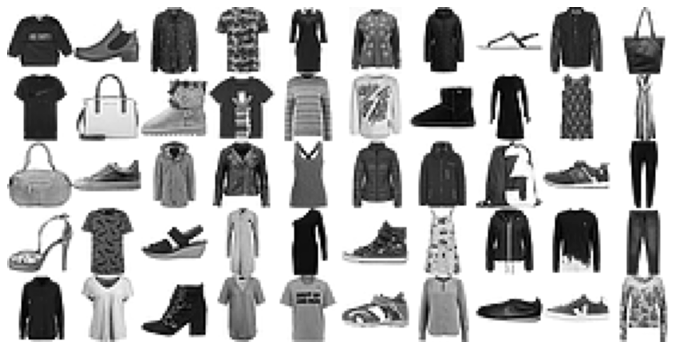

In [124]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size,image_size) for image in images]
    
    n_rows = (len(images)-1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = "binary")
    plt.axis("off")
    
plt.figure(figsize=(12,12))
plot_images_matrix(X_train[:50], 28, 10)
plt.show()

# SGD Classifier
## Logistic Regression

### Entrenamiento

In [125]:
from sklearn.linear_model import SGDClassifier

In [126]:
model = SGDClassifier(loss = 'log', random_state = 50)
model.fit(X_train, y_train.ravel())

SGDClassifier(loss='log', random_state=50)

### Verificación

In [127]:
y_predicted = model.predict(X_test)
y_predicted[10:30]

array([3, 4, 2, 6, 8, 5, 2, 3, 6, 4, 4, 4, 2, 1, 5, 9, 8, 4, 4, 1],
      dtype=int64)

In [128]:
y_test[10:30].values.reshape(1, -1)

array([[3, 4, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1]],
      dtype=int64)

In [129]:
(y_predicted[10:30] == y_test[10:30].values.reshape(1, -1)).astype(int)

array([[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]])

In [130]:
model.score(X_test, y_test)

0.8463

[3 4 2 6 8 5 2 3 6 4 4 4 2 1 5 9 8 4 4 1]
[3 4 4 6 8 5 6 3 6 4 4 4 2 1 5 7 8 4 4 1]


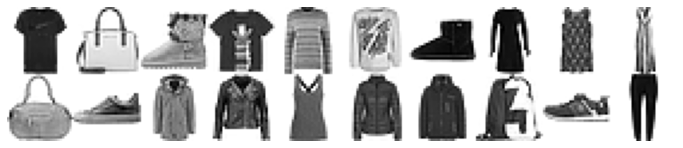

In [131]:
print(y_predicted[10:30])
print(y_test[10:30].ravel())

plt.figure(figsize=(12,12))
plot_images_matrix(X_train[10:30], 28, 10)
plt.show()

### Resultados de las métricas

In [132]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

In [133]:
cm = multilabel_confusion_matrix(y_test, y_predicted)
print(cm)

[[[8766  234]
  [ 160  840]]

 [[8969   31]
  [  30  970]]

 [[8657  343]
  [ 159  841]]

 [[8797  203]
  [  95  905]]

 [[8848  152]
  [ 301  699]]

 [[8897  103]
  [  75  925]]

 [[8775  225]
  [ 474  526]]

 [[8912   88]
  [ 110  890]]

 [[8919   81]
  [  55  945]]

 [[8923   77]
  [  78  922]]]


In [134]:
precision_score(y_test, y_predicted, average = None)

array([0.78212291, 0.96903097, 0.71030405, 0.816787  , 0.8213866 ,
       0.89980545, 0.70039947, 0.91002045, 0.92105263, 0.92292292])

In [135]:
recall_score(y_test, y_predicted, average = None)

array([0.84 , 0.97 , 0.841, 0.905, 0.699, 0.925, 0.526, 0.89 , 0.945,
       0.922])

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

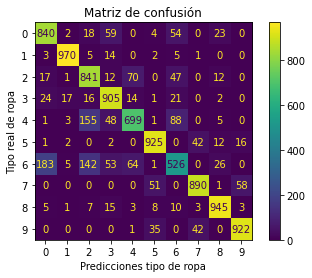

In [137]:

matrix = confusion_matrix(y_test, y_predicted)
matrixDisplay = ConfusionMatrixDisplay(matrix, display_labels=['0', '1', '2', '3', '4', '5','6','7','8','9'])
matrixDisplay.plot()
matrixDisplay.ax_.set(title='Matriz de confusión', xlabel='Predicciones tipo de ropa', ylabel='Tipo real de ropa')
plt.show()

In [138]:
from sklearn.metrics import r2_score

In [139]:
r2_score(y_test, y_predicted)

0.7527757575757575

# Logistic Regression
## One vs All

### Entrenamiento

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
model = LogisticRegression(C = 10 ** 10, multi_class = 'ovr', max_iter = 200)
model.fit(X_train, y_train.ravel())

C:\Users\jeres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=10000000000, max_iter=200, multi_class='ovr')

### Verificación

In [142]:
y_predicted = model.predict(X_test)
y_predicted[10:30]

array([3, 4, 2, 6, 8, 5, 4, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1],
      dtype=int64)

In [143]:
y_test.values[10:30].reshape(1, -1)

array([[3, 4, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1]],
      dtype=int64)

In [144]:
(y_predicted[10:30] == y_test[10:30].values.reshape(1, -1)).astype(int)

array([[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [145]:
model.score(X_test, y_test)

0.8501

[3 4 2 6 8 5 4 3 6 4 4 4 2 1 5 7 8 4 4 1]
[3 4 4 6 8 5 6 3 6 4 4 4 2 1 5 7 8 4 4 1]


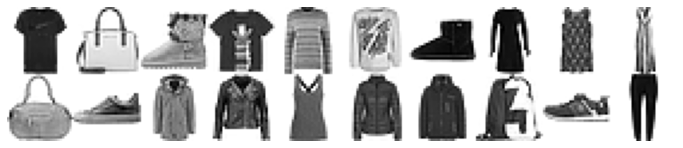

In [146]:
print(y_predicted[10:30])
print(y_test[10:30].ravel())

plt.figure(figsize=(12,12))
plot_images_matrix(X_train[10:30], 28, 10)
plt.show()

### Resultados de las métricas

In [147]:
cm = multilabel_confusion_matrix(y_test, y_predicted)
print(cm)

[[[8775  225]
  [ 180  820]]

 [[8957   43]
  [  31  969]]

 [[8773  227]
  [ 235  765]]

 [[8840  160]
  [ 121  879]]

 [[8769  231]
  [ 197  803]]

 [[8933   67]
  [  91  909]]

 [[8698  302]
  [ 430  570]]

 [[8902   98]
  [  86  914]]

 [[8928   72]
  [  68  932]]

 [[8926   74]
  [  60  940]]]


In [148]:
precision_score(y_test, y_predicted, average = None)

array([0.784689  , 0.95750988, 0.77116935, 0.84600577, 0.77659574,
       0.93135246, 0.65366972, 0.90316206, 0.92828685, 0.9270217 ])

In [149]:
recall_score(y_test, y_predicted, average = None)

array([0.82 , 0.969, 0.765, 0.879, 0.803, 0.909, 0.57 , 0.914, 0.932,
       0.94 ])

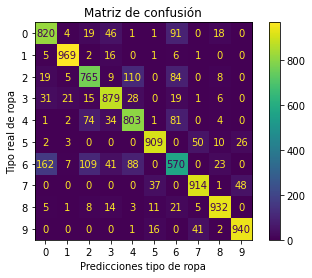

In [150]:
matrix = confusion_matrix(y_test, y_predicted)
matrixDisplay = ConfusionMatrixDisplay(matrix, display_labels=['0', '1', '2', '3', '4', '5','6','7','8','9'])
matrixDisplay.plot()
matrixDisplay.ax_.set(title='Matriz de confusión', xlabel='Predicciones tipo de ropa', ylabel='Tipo real de ropa')
plt.show()

In [151]:
r2_score(y_test, y_predicted)

0.7540242424242425

## Multinomial

### Entrenamiento

In [152]:
model = LogisticRegression(C = 10 ** 10, multi_class = 'multinomial', max_iter = 200)
model.fit(X_train, y_train.ravel())

C:\Users\jeres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000, max_iter=200, multi_class='multinomial')

### Verificación

In [153]:
y_predicted = model.predict(X_test)
y_predicted[10:30]

array([3, 4, 2, 4, 8, 5, 4, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1],
      dtype=int64)

In [154]:
y_test[10:30].values.reshape(1, -1)

array([[3, 4, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1]],
      dtype=int64)

In [155]:
(y_predicted[10:30] == y_test[10:30].values.reshape(1, -1)).astype(int)

array([[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [156]:
model.score(X_test, y_test)

0.8523

[3 4 2 4 8 5 4 3 6 4 4 4 2 1 5 7 8 4 4 1]
[3 4 4 6 8 5 6 3 6 4 4 4 2 1 5 7 8 4 4 1]


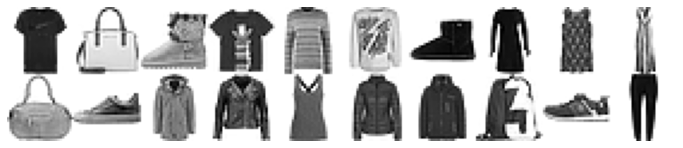

In [157]:
print(y_predicted[10:30])
print(y_test[10:30].ravel())

plt.figure(figsize=(12,12))
plot_images_matrix(X_train[10:30], 28, 10)
plt.show()

### Resultados de las métricas

In [158]:
cm = multilabel_confusion_matrix(y_test, y_predicted)
print(cm)

[[[8782  218]
  [ 182  818]]

 [[8963   37]
  [  26  974]]

 [[8787  213]
  [ 251  749]]

 [[8875  125]
  [ 135  865]]

 [[8750  250]
  [ 194  806]]

 [[8938   62]
  [  86  914]]

 [[8663  337]
  [ 402  598]]

 [[8897  103]
  [  85  915]]

 [[8939   61]
  [  54  946]]

 [[8929   71]
  [  62  938]]]


In [159]:
precision_score(y_test, y_predicted, average = None)

array([0.78957529, 0.96340257, 0.77858628, 0.87373737, 0.76325758,
       0.93647541, 0.63957219, 0.89882122, 0.93942403, 0.9296333 ])

In [160]:
recall_score(y_test, y_predicted, average = None)

array([0.818, 0.974, 0.749, 0.865, 0.806, 0.914, 0.598, 0.915, 0.946,
       0.938])

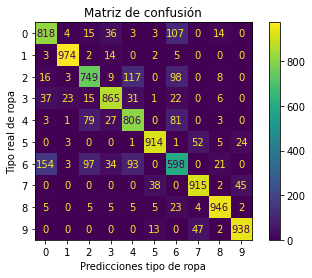

In [161]:
matrix = confusion_matrix(y_test, y_predicted)
matrixDisplay = ConfusionMatrixDisplay(matrix, display_labels=['0', '1', '2', '3', '4', '5','6','7','8','9'])
matrixDisplay.plot()
matrixDisplay.ax_.set(title='Matriz de confusión', xlabel='Predicciones tipo de ropa', ylabel='Tipo real de ropa')
plt.show()

In [162]:
r2_score(y_test, y_predicted)

0.7615515151515151